In [1218]:
import numpy as np
import scipy.io as sio
from scipy import stats
import matplotlib.pyplot as plt

加载数据

In [1219]:
path = 'data/ex8data1.mat'
data = sio.loadmat(path)
X = data['X']
Xval = data['Xval']
Yval = data['yval']

画散点图

In [1220]:
def plot_scatter(X, fig, ax):
    X1 = X[:, 0]
    X2 = X[:, 1]
    ax.scatter(X1, X2, marker= '+', c= 'blue')
    

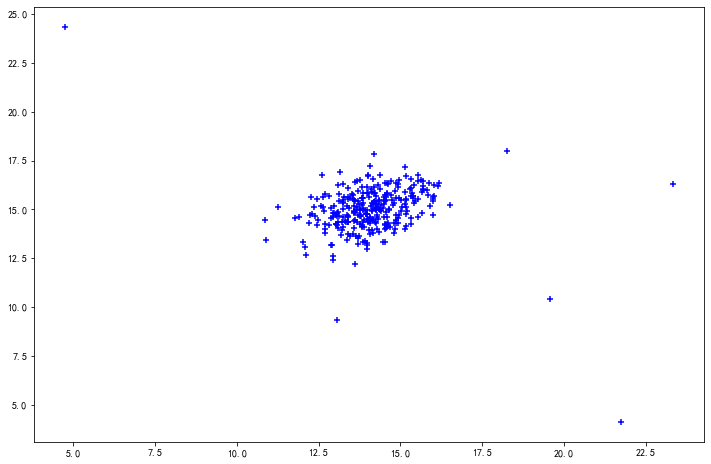

In [1221]:
fig, ax = plt.subplots(figsize= (12,8))
plot_scatter(X, fig, ax)
plt.show()

编写计算mu,var和cov的函数
编写计算多元和单元高斯分布概率密度P的函数

In [1222]:
def compute_MuCovVar(X):
    mu = np.mean(X, axis= 0)
    var = np.var(X, axis= 0)
    cov = np.cov(X.T)
    #sigma_2 = np.var(X, axis= 0)
    return mu, var, cov

def multivariateGaussian(X, mu, cov, var):
    #普通高斯分布的概率密度
    P_single = stats.multivariate_normal(mu, var).pdf(X)
    #多变量高斯分布的概率密度
    P_muti = stats.multivariate_normal(mu, cov).pdf(X)
    return P_single, P_muti
#测试函数功能是否正常
# mu, var, cov = compute_MuCovVar(X) 
# print(mu)
# print(var)
# print(cov)
# P_single, P_muti = multivariateGaussian(X, mu, cov, var)
# print(P_single)
# print(P_muti)

编写绘制等高线的函数

In [1223]:
def plot_contour(X, fig, ax, choose):
    mu, var, cov = compute_MuCovVar(X)
    X1 = np.linspace(0, 30, 100)
    X2 = np.linspace(0, 30, 100)
    X1, X2 = np.meshgrid(X1, X2)
    y_sigle = np.zeros(X1.shape)
    y_multi = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        temp = np.array([X1[:, i], X2[:, i]]).T
        y_sigle[:, i], y_multi[:, i] = multivariateGaussian(temp, mu, cov, var)
    line_lv = [1e-16, 1e-8, 1e-4, 0.015, 0.075]
    if choose == 'single':
        ax.contour(X1, X2, y_sigle, colors='black', levels= line_lv)
    elif choose == 'multi':
        ax.contour(X1, X2, y_multi, colors='black', levels= line_lv)

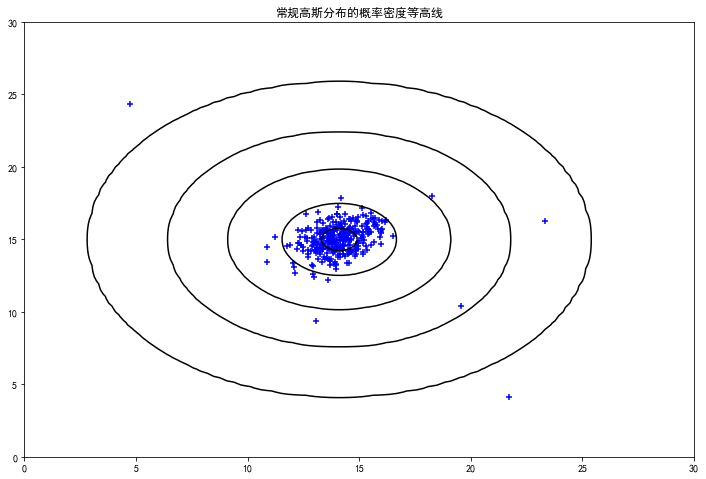

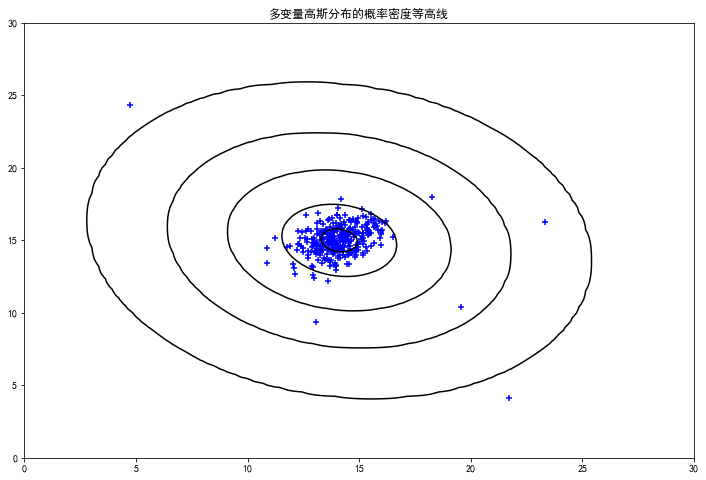

In [1224]:
#设置标题可以显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize= (12,8))
plot_scatter(X, fig, ax)
plot_contour(X, fig, ax, 'single')
plt.title('常规高斯分布的概率密度等高线')
plt.show()

fig, ax = plt.subplots(figsize= (12,8))
plot_scatter(X, fig, ax)
plot_contour(X, fig, ax, 'multi')
plt.title('多变量高斯分布的概率密度等高线')
plt.show()

编写寻找判断样本是否异常的临界值epsilon的函数

In [1225]:
def threshold(pval, yval):
    np.set_printoptions(threshold=50)
    step = (np.max(pval) - np.min(pval)) / 1000
    best_epsilon = 0
    best_F1 = 0
    for epsilon in np.arange(np.min(pval), np.max(pval), step):
        pre_y = pval < epsilon
        tp = np.sum(np.logical_and(pre_y == 1, yval.T == 1)).astype(float)
        fp = np.sum(np.logical_and(pre_y == 1, yval.T == 0)).astype(float)
        fn = np.sum(np.logical_and(pre_y == 0, yval.T == 1)).astype(float)
    
        prec= tp / (tp + fp)
        rec= tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
    return best_epsilon, best_F1
        

In [1226]:
mu, var, cov = compute_MuCovVar(X)
psingle_val, pmulti_val = multivariateGaussian(Xval, mu, cov, var)
epsilon, F1 = threshold(psingle_val, Yval)
print(epsilon)
print(F1)

8.990852779269493e-05
0.8750000000000001


D:\pycharm\pro\test\venv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


画异常点

In [1227]:
def plot_anomaly(epsilon, p, X, fig, ax):
    anomaly = np.where(p < epsilon)
    print(anomaly)
    ax.scatter(X[anomaly, 0], X[anomaly, 1], marker= '+', c= 'red', s= 100)
    

8.990852779269493e-05
(array([300, 301, 303, 304, 305, 306], dtype=int64),)


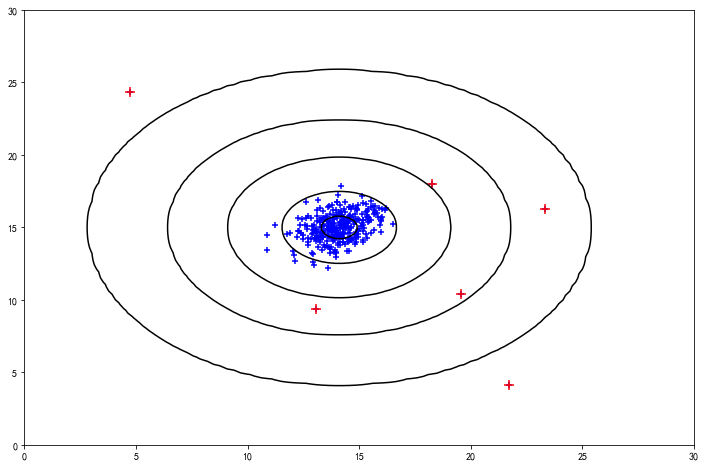

In [1228]:
fig, ax = plt.subplots(figsize= (12,8))
plot_scatter(X, fig, ax)
P_single, P_muti = multivariateGaussian(X, mu, cov, var)
plot_contour(X, fig, ax, 'single')
print(epsilon)
plot_anomaly(epsilon, P_single, X, fig, ax)

将该方法应用之高维数据集

In [1229]:
path2 = 'data/ex8data2.mat'
data2 = sio.loadmat(path2)
X2 = data2['X']
X2val = data2['Xval']
Y2val = data2['yval']
mu2, var2, cov2 = compute_MuCovVar(X2)
p2_single, p2_multi = multivariateGaussian(X2, mu2, cov2, var2)
p2val_single, p2val_multi = multivariateGaussian(X2val, mu2, cov2, var2)
epsilon2, F1_2 = threshold(p2val_single, Y2val)
print('epsilon2:' + str(epsilon2) + ' F1_2:' + str(F1_2))
num_anomaly = np.sum(p2_single < epsilon2)
print('坏点个数:' + str(num_anomaly))


epsilon2:1.3772288907613604e-18F1_2:0.6153846153846154
坏点个数:117


D:\pycharm\pro\test\venv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
